<a href="https://colab.research.google.com/github/PsorTheDoctor/artificial-intelligence/blob/master/modern_approach/text_to_image/hard_prompts_made_easy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hard Prompts Made Easy

In [ ]:
!pip3 install -q transformers==4.23.1 sentence-transformers==2.2.2 ftfy==6.1.1 mediapy==1.1.2 diffusers==0.11.1
!git clone https://github.com/YuxinWenRick/hard-prompts-made-easy
%cd hard-prompts-made-easy

In [27]:
import torch
import open_clip
import mediapy as media
from optim_utils import *
import argparse
from diffusers import DPMSolverMultistepScheduler, StableDiffusionPipeline
from PIL import Image

In [29]:
args = argparse.Namespace()
args.__dict__.update(read_json("sample_config.json"))
args

Namespace(batch_size=1, clip_model='ViT-H-14', clip_pretrain='laion2b_s32b_b79k', iter=3000, lr=0.1, print_step=100, prompt_bs=1, prompt_len=8, weight_decay=0.1)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, _, clip_preprocess = open_clip.create_model_and_transforms(
    args.clip_model, pretrained=args.clip_pretrain, device=device
)
tokenizer = open_clip.tokenizer._tokenizer
token_embedding = model.token_embedding
preprocess = clip_preprocess

In [ ]:
image_length = 512
model_id = "stabilityai/stable-diffusion-2-1-base"
scheduler = DPMSolverMultistepScheduler.from_pretrained(model_id, subfolder="scheduler")

pipe = StableDiffusionPipeline.from_pretrained(
    model_id, scheduler=scheduler, torch_dtype=torch.float16, revision="fp16"
)
pipe = pipe.to(device)

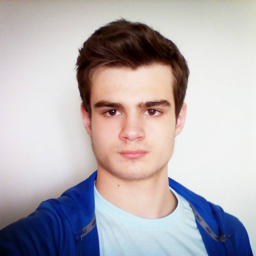

In [9]:
img = Image.open('/content/adam.jpg')
img.resize((256, 256))

In [ ]:
learned_prompt = optimize_prompt(model, preprocess, args, device, target_images=[img])

##Generate with Stable Diffusion

  0%|          | 0/25 [00:00<?, ?it/s]

prompt: stefan arrogant ). sponsoring directioner skype ethereum tutor 


,,,

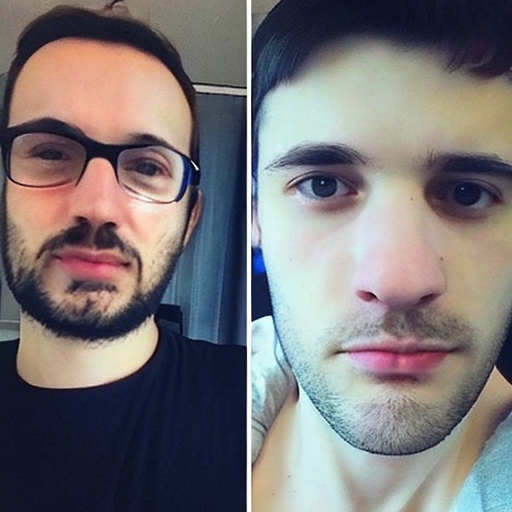
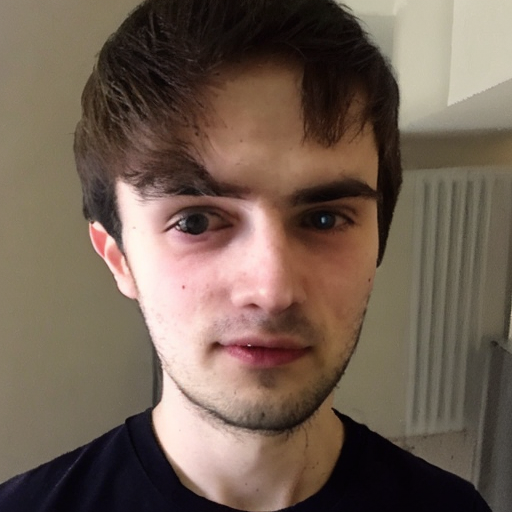
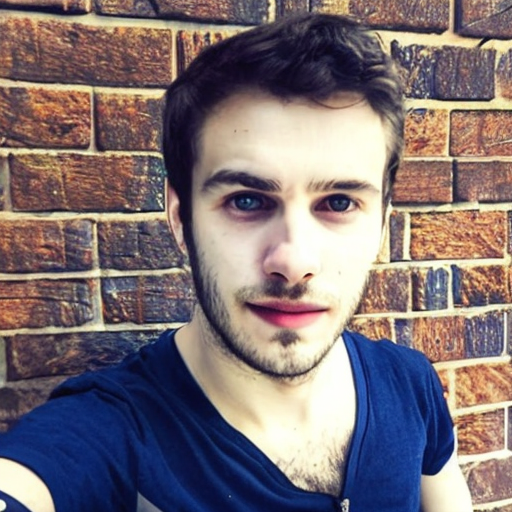
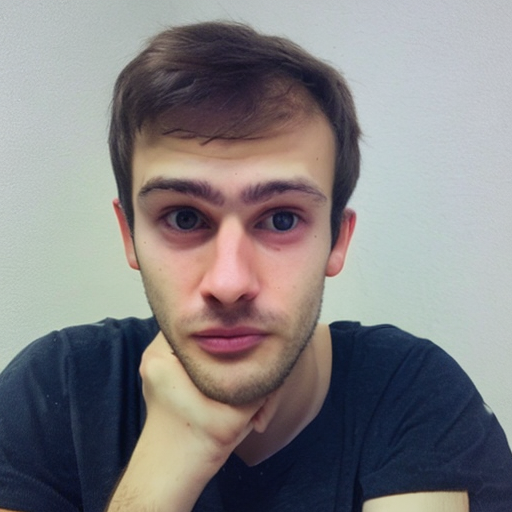

In [33]:
num_images = 4
guidance_scale = 9
num_inference_steps = 25

images = pipe(
    learned_prompt,
    num_images_per_prompt=num_images,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=image_length,
    width=image_length,
  ).images

print(f'prompt: {learned_prompt}')
media.show_images(images)